   amount  interest grade  years ownership   income  age
0    5000     10.65     B     10      RENT  24000.0   33
1    2400     10.99     C     25      RENT  12252.0   31
2   10000     13.49     C     13      RENT  49200.0   24
3    5000     10.99     A      3      RENT  36000.0   39
4    3000     10.99     E      9      RENT  48000.0   24
amount       0
interest     0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64
             amount      interest         years        income           age
count  29091.000000  29091.000000  29091.000000  2.909100e+04  29091.000000
mean    9593.663848     11.003117      6.085422  6.696489e+04     27.698120
std     6323.467488      3.080636      6.593591  5.325318e+04      6.194617
min      500.000000      5.420000      0.000000  4.000000e+03     20.000000
25%     5000.000000      8.490000      2.000000  4.000000e+04     23.000000
50%     8000.000000     10.990000      4.000000  5.640000e+04     26.000000
75%    1

<ipython-input-16-4efa90c7b98b>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


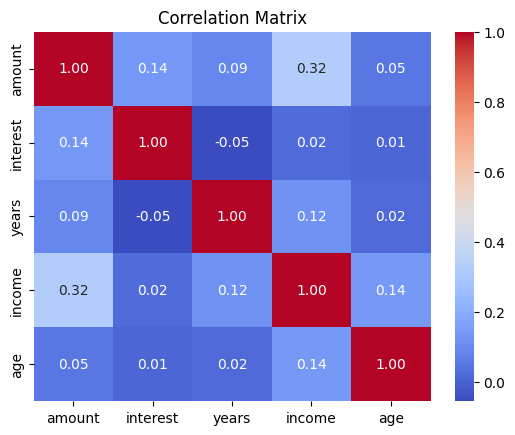

In [16]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'data.csv'
file_path = '/content/loan_data_nov2023.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

# Visualize relationships between features (for example, a correlation matrix)
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Handling missing values (if any)
df.dropna(inplace=True)  # For simplicity, we'll drop any rows with missing values. You may choose a different strategy.

# Convert categorical variables to numerical representations (one-hot encoding)
df = pd.get_dummies(df, columns=['grade', 'ownership'], drop_first=True)

# Display the updated DataFrame
print(df.head())

# Scale numerical features (if necessary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['interest', 'years', 'income', 'age']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the updated DataFrame after scaling
print(df.head())

   amount  interest  years   income  age  grade_B  grade_C  grade_D  grade_E  \
0    5000     10.65     10  24000.0   33        1        0        0        0   
1    2400     10.99     25  12252.0   31        0        1        0        0   
2   10000     13.49     13  49200.0   24        0        1        0        0   
3    5000     10.99      3  36000.0   39        0        0        0        0   
4    3000     10.99      9  48000.0   24        0        0        0        1   

   grade_F  grade_G  ownership_OTHER  ownership_OWN  ownership_RENT  
0        0        0                0              0               1  
1        0        0                0              0               1  
2        0        0                0              0               1  
3        0        0                0              0               1  
4        0        0                0              0               1  
   amount  interest     years    income       age  grade_B  grade_C  grade_D  \
0    5000 -0.114627

In [18]:
# Create interaction terms (if needed)
df['income_years'] = df['income'] * df['years']
df['age_interest'] = df['age'] * df['interest']

# Display the updated DataFrame with new features
print(df.head())

   amount  interest     years    income       age  grade_B  grade_C  grade_D  \
0    5000 -0.114627  0.593705 -0.806818  0.855900        1        0        0   
1    2400 -0.004258  2.868680 -1.027429  0.533033        0        1        0   
2   10000  0.807277  1.048700 -0.333599 -0.596999        0        1        0   
3    5000 -0.004258 -0.467951 -0.581476  1.824499        0        0        0   
4    3000 -0.004258  0.442040 -0.356133 -0.596999        0        0        0   

   grade_E  grade_F  grade_G  ownership_OTHER  ownership_OWN  ownership_RENT  \
0        0        0        0                0              0               1   
1        0        0        0                0              0               1   
2        0        0        0                0              0               1   
3        0        0        0                0              0               1   
4        1        0        0                0              0               1   

   income_years  age_interest  
0     

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into features (X) and the target variable ('amount') (y)
X = df.drop('amount', axis=1)
y = df['amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 34265864.069193654
R-squared: 0.14270707995777543


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Make predictions
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error after Hyperparameter Tuning: {mse_tuned}')
print(f'R-squared after Hyperparameter Tuning: {r2_tuned}')

Best Alpha: 1
Mean Squared Error after Hyperparameter Tuning: 34267429.48878396
R-squared after Hyperparameter Tuning: 0.14266791494127506


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error with Random Forest: {mse_rf}')
print(f'R-squared with Random Forest: {r2_rf}')


Mean Squared Error with Random Forest: 33043079.8560499
R-squared with Random Forest: 0.17329974928462277


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search_rf.best_params_['n_estimators']
best_max_depth = grid_search_rf.best_params_['max_depth']

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f'Best Hyperparameters - n_estimators: {best_n_estimators}, max_depth: {best_max_depth}')
print(f'Mean Squared Error after Hyperparameter Tuning: {mse_rf_tuned}')
print(f'R-squared after Hyperparameter Tuning: {r2_rf_tuned}')


Best Hyperparameters - n_estimators: 150, max_depth: 10
Mean Squared Error after Hyperparameter Tuning: 30844948.05278228
R-squared after Hyperparameter Tuning: 0.22829450524512307


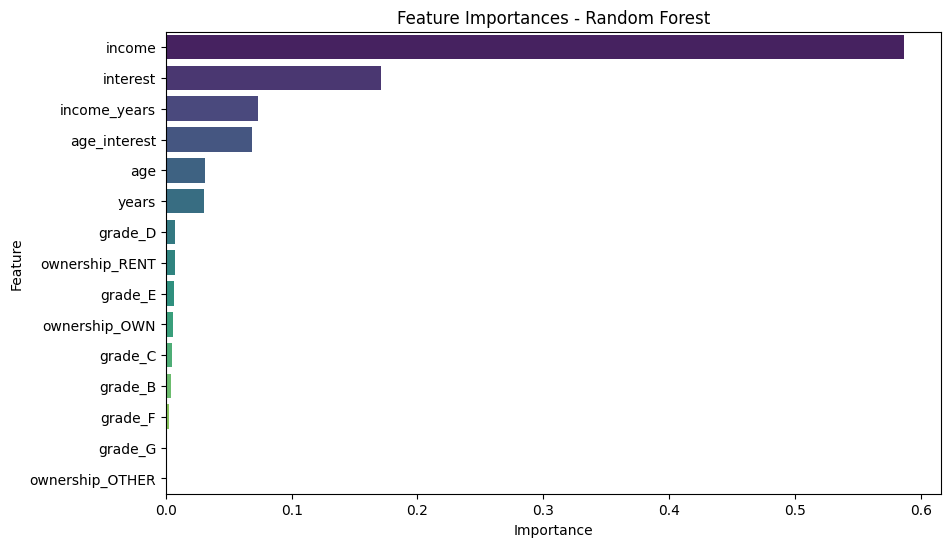

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the tuned Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.show()

In [25]:
from sklearn.linear_model import Ridge

# Define the Ridge regression model
ridge_model = Ridge()

# Define the hyperparameters to tune
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Train the Ridge model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge_tuned = best_ridge_model.predict(X_test)

# Evaluate the tuned Ridge model
mse_ridge_tuned = mean_squared_error(y_test, y_pred_ridge_tuned)
r2_ridge_tuned = r2_score(y_test, y_pred_ridge_tuned)

print(f'Best Alpha for Ridge Regression: {best_alpha_ridge}')
print(f'Mean Squared Error after Hyperparameter Tuning (Ridge): {mse_ridge_tuned}')
print(f'R-squared after Hyperparameter Tuning (Ridge): {r2_ridge_tuned}')

Best Alpha for Ridge Regression: 1
Mean Squared Error after Hyperparameter Tuning (Ridge): 34267429.48878396
R-squared after Hyperparameter Tuning (Ridge): 0.14266791494127506


In [27]:
from sklearn.linear_model import Lasso

# Define the Lasso regression model
lasso_model = Lasso()

# Define the hyperparameters to tune
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Train the Lasso model with the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha_lasso)
best_lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso_tuned = best_lasso_model.predict(X_test)

# Evaluate the tuned Lasso model
mse_lasso_tuned = mean_squared_error(y_test, y_pred_lasso_tuned)
r2_lasso_tuned = r2_score(y_test, y_pred_lasso_tuned)

print(f'Best Alpha for Lasso Regression: {best_alpha_lasso}')
print(f'Mean Squared Error after Hyperparameter Tuning (Lasso): {mse_lasso_tuned}')
print(f'R-squared after Hyperparameter Tuning (Lasso): {r2_lasso_tuned}')

Best Alpha for Lasso Regression: 0.1
Mean Squared Error after Hyperparameter Tuning (Lasso): 34266297.142903924
R-squared after Hyperparameter Tuning (Lasso): 0.14269624494643818
